In [ ]:
!pip install nltk
!pip install textract
!pip install pdf2docx
!pip install -U spacy
!pip install pdf2docx
!python -m spacy download en_core_web_sm


2023-08-24 07:50:05.656939: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# **Import Library**

In [ ]:
import os #for interaction with operating system
import re #use for regular expression
import nltk #for text preprocessing purpose
import spacy #it uses for documentation
import textract
import pdf2docx
import string
import pandas as pd
import numpy as np
import seaborn as sns #for graps

import nltk
nltk.download("stopwords")
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize,RegexpTokenizer #for tokenization
from wordcloud import wordcloud,STOPWORDS #for stopwords removel
from nltk.stem import PorterStemmer,WordNetLemmatizer #for stemming and lemmitization purpose
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer #word count

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.pylab  as pylab


# **import all Resume File**

In [ ]:
!git clone https://github.com/Himanshupatil9723/Dataset.git


In [ ]:
os.listdir("/content/Dataset/Resumes")

# **Extract The Text From Dataset**

In [ ]:
#create filepath and category for peoplesoft resume folder
file_path1 = []
category1 = []
directory1 = '/content/Dataset/Resumes/Peoplesoft resumes'
for i in os.listdir(directory1):
  if i.endswith(".docx"):
    os.path.join(directory1,i)
    file_path1.append((textract.process(os.path.join(directory1,i))).decode("utf-8"))
    category1.append("PeopleSoft")

In [ ]:
#create dataset for PeopleSoft Resume Folder
data1 = pd.DataFrame(data = file_path1,columns = ["Raw_Details"])
data1["Category1"] = category1
data1

In [ ]:
from pdf2docx import Converter

path_input = '/content/Dataset/Resumes/React Developer'
path_output = '/content/Dataset/Resumes/React Developer'


#convert pdf file to .**docx**

In [ ]:
#convert pdf file to .docx
for file in os.listdir(path_input):
    if file.endswith('.pdf'):
        final = os.path.join(path_input, file)
        cv = Converter(final)
        basename = os.path.splitext(file)[0]
        print(basename)
        cv.convert(path_output + '/' + basename+'.docx', start=0, end=None)
        cv.close()

In [ ]:
#create filepath and category for React Developer folder
file_path2 = []
category2 = []
directory2 = '/content/Dataset/Resumes/React Developer'
for i in os.listdir(directory2):
  if i.endswith(".docx"):
    os.path.join(directory2,i)
    file_path2.append((textract.process(os.path.join(directory2,i))).decode("utf-8"))
    category2.append("React Developer")

In [ ]:
#create dataset for React Developer Folder
data2 = pd.DataFrame(data = file_path2,columns = ["Raw_Details"])
data2["Category2"] = category2
data2

In [ ]:
#create filepath and category for SQL Developer Lightning insight folder
file_path3 = []
category3 = []
directory3 = '/content/Dataset/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory3):
  if i.endswith(".docx"):
    os.path.join(directory3,i)
    file_path3.append((textract.process(os.path.join(directory3,i))).decode("utf-8"))
    category3.append("SQL Developer Lightning insight")

In [ ]:
#create dataset for SQL Developer Lightning insight Folder
data3 = pd.DataFrame(data = file_path3,columns = ["Raw_Details"])
data3["Category3"] = category3
data3

In [ ]:
#create filepath and category for workday resumes folder
file_path4 = []
category4 = []
directory4 = '/content/Dataset/Resumes/workday resumes'
for i in os.listdir(directory4):
  if i.endswith(".docx"):
    os.path.join(directory4,i)
    file_path4.append((textract.process(os.path.join(directory4,i))).decode("utf-8"))
    category4.append("workday resumes")

In [ ]:
#create dataset for workday resumes Folder
data4 = pd.DataFrame(data = file_path4,columns = ["Raw_Details"])
data4["Category4"] = category4
data4

# **Create DataFrame**

In [ ]:
resume_data = data1.append([data2,data3,data4],ignore_index = True)
resume_data

In [ ]:
resume_data.info()

In [ ]:
resume_data.isna().sum()

# **Merge All Unnecessary column in one column**

In [ ]:
resume_data["Category"] = category1 + category2 + category3 + category4

In [ ]:
resume_data

# **Drop Unnecessary column**

In [ ]:
resume_data.drop(["Category1","Category2","Category3","Category4"],axis = 1,inplace = True)

In [ ]:
resume_data

# **Final dataset**

In [ ]:
resume_data.head(15)

## **EDA AND VISUALISATION**

In [ ]:
resume_data.head()

In [ ]:
resume_data.info()

In [ ]:
resume_data["Category"].value_counts()

# **Bar Plot**

In [ ]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= resume_data.Category.value_counts().index, y= resume_data.Category.value_counts(), width=0.5,
                 data= resume_data, ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'medium')
plt.title('Number of Category in Resumes', fontsize= 15, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 10)

plt.tight_layout()

# **Percentage of Category by using pie graph**

In [ ]:
fig = plt.figure(figsize=(10,10),dpi=100)

sizes = resume_data.Category.value_counts()
labels = resume_data.Category.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode,
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

fig.tight_layout()
plt.show()


In [ ]:
raw_data = resume_data["Raw_Details"][4]
raw_data

In [ ]:
len(raw_data)

# **Data Understanding**

In [ ]:
resume_data

# **Data points in which category is PeopleSoft **

In [ ]:
resume_data["Category"].unique()

In [ ]:
resume_data[resume_data.Category == "PeopleSoft"]

In [ ]:
resume_data[resume_data.Category == "React Developer  `"]

In [ ]:
resume_data[resume_data.Category == "SQL Developer Lightning insight"]

In [ ]:
resume_data[resume_data.Category == "workday resumes"]

In [ ]:
resume_data["Category"].value_counts()

In [ ]:
resume_data.isna().sum()

In [ ]:
sns.heatmap(resume_data.isna())

# **Number Of Words In Each Resume**

In [ ]:
resume_data["Words_counts"] = resume_data["Raw_Details"].apply(lambda x : len(str(x).split(" ")))
resume_data

# **Number Of Characters in Each Resume**

In [ ]:
resume_data["Char_Counts"] = resume_data["Raw_Details"].str.len() #including spaces
resume_data

# **Number Of Stopwords In Each Resume**

In [ ]:
stop = stopwords.words("english")
resume_data["Stopwords"] = resume_data["Raw_Details"].apply(lambda x : len([x for x in x.split() if x in stop]))
resume_data

# **Number of Numeric in each Resume**

In [ ]:
resume_data["Numerics"] = resume_data["Raw_Details"].apply(lambda x : len([x for x in x.split() if x.isdigit()]))
resume_data

In [ ]:
sns.histplot(resume_data["Numerics"])

# Note :
# most of the data points having numeric value are in the range of 0 to 10

In [ ]:
sns.histplot(resume_data['Char_Counts'])

# Note:
# most of the data points having char counts are in the range of 2500 to 10000

In [ ]:
sns.histplot(resume_data["Stopwords"])

#note :
# most of the data points having stopwords are in the range of 50 to 200

In [ ]:
sns.histplot(resume_data["Words_counts"])

#note :
#most of the data points having words_counts are in the range of 250 to 1000

# **Text PreProcessing**

In [ ]:
!pip install clean-text

In [ ]:
#import libraries for textpreprocessing
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re
from cleantext import clean

In [ ]:
raw_data

# **Cleaning The data**

In [ ]:
def preprocess(sentence):

    #convert into string
    sentence = str(sentence)

    # Convert the sentence to lowercase
    sentence = sentence.lower()

    # Remove "{html}"
    sentence = sentence.replace('{html}', '')

    # Remove HTML tags
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, '', sentence)

    # Remove web links (URLs)
    sentence = re.sub(r'http\S+', '', sentence)

    # Remove numbers
    sentence = re.sub(r'\d+', '', sentence)

    # Tokenize the sentence into words
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)

    #remove stopwords and short words(length<=2)
    filtered_words  = [w for w in tokens if len(w) > 2 if w not in stopwords.words("english")]

    #return cleaned sentence as string
    return" ".join(filtered_words)

In [ ]:
resume_data["Resume_details"] = resume_data.Raw_Details.apply(lambda x : preprocess(x))

In [ ]:
resume_data

# **Droping columns**

In [ ]:
resume_data.drop(columns = ["Raw_Details","Words_counts","Char_Counts","Stopwords","Numerics"],inplace=True)

In [ ]:
resume_data

In [ ]:
resume_data["Resume_details"][1]

In [ ]:
#we need to do this
pd.set_option("display.max_colwidth",None)

In [ ]:
resume_data

# **Named Entity Recognition(NER)**

In [ ]:
resume_data.columns

In [ ]:
txt = " ".join(resume_data["Resume_details"])
txt

In [ ]:
len(txt)

# **en_core_web_sm Model For NER**

In [ ]:
from spacy import displacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")


In [ ]:
displacy.render(nlp(txt),style = "ent",jupyter = True )

# **WordCloud**

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(background_color = "Black",height = 600,width = 1000).generate(txt)
plt.figure(figsize=(2,1),dpi = 800)
plt.imshow(wc)
plt.axis("off")
plt.title("Most Frequent Words",size =5)

In [ ]:
import nltk
nltk.download('punkt')


In [ ]:
# Step 1: Initialize a list to store important words
totalWords = []

# Assuming 'resume_data' contains the resume details

# Step 2: Loop through each resume text
for resume_text in resume_data['Resume_details'].values:

# Step 2a: Tokenize the text into individual words
    requiredWords = nltk.word_tokenize(resume_text)

# Step 2b: Filter out stopwords and punctuation, and store important words
    for word in requiredWords:
      totalWords.append(word)
# Step 3: Count occurrences of each word
wordfreqdist = nltk.FreqDist(totalWords)

# Step 4: Find the 50 most common words
mostcommon = wordfreqdist.most_common(50)

# Step 5: Print the most common words
print(mostcommon)


In [ ]:
mstcmn_25 = pd.DataFrame(mostcommon[0:25])
mstcmn_25 = mstcmn_25.rename(columns = {0:"Words",1:"Counts"})
mstcmn_25

# **Visualizing Top 25 Most Frequent Words**

In [ ]:
# Assuming 'wd_df' contains word frequencies and words, and 'resume_data' contains resume details

# Create a figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 7), dpi=200)

# Create the bar plot
sns.barplot(x=mstcmn_25['Counts'].head(20), y=mstcmn_25['Words'].head(20), data=mstcmn_25, ax=ax,
            label='Total Profile Category: {}'.format(len(resume_data['Category'].unique())))

# Customize the plot
ax.set_xlabel('Frequency', size=16, fontweight='bold')
ax.set_ylabel('Words', size=16, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(loc='best', fontsize='x-large')
plt.title('Top 25 Most Frequent Words in Resumes', fontsize=18, fontweight='bold')

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i, color='black', fontweight='bold', fontsize=12)

# Adjust layout and display the plot
fig.tight_layout()
plt.show()


from the above WordCloud we found that

Project,

Experience,

Application.

Work, and so on

are the most frequent words in our Resume dataset  

# **Comparession Between Stemming and Lemmatization**

Stemming = Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling.

Lemmatization = Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma.



#Difference Between **Stemming** And **Lemmatization**

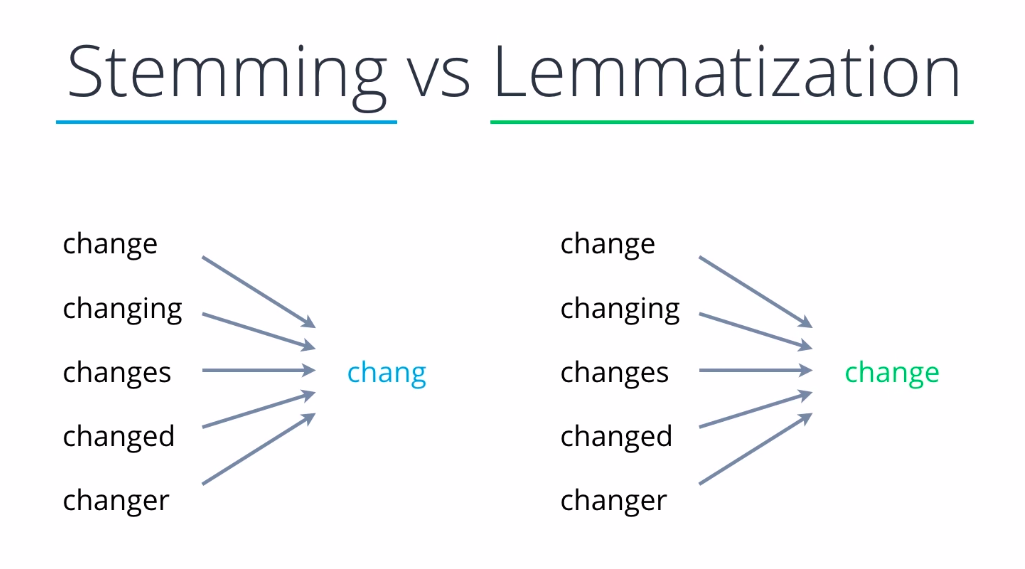

# **Stemming**

In [ ]:
stem = PorterStemmer()

In [ ]:
resume_data

In [ ]:
Resume_details =resume_data["Resume_details"]

In [ ]:
Resume_details

In [ ]:
len(Resume_details)

In [ ]:
stem_words = []

for i in Resume_details:
  word = word_tokenize(i)
  for i in word:
    if i not in stopwords.words("english"):
      stem_words.append(stem.stem(i))

In [ ]:
stem_words

In [ ]:
len(txt)

In [ ]:
len(stem_words)

In [ ]:
Stem_Words = pd.DataFrame(stem_words)
Stem_Words

In [ ]:
Stem_Words.nunique()

# **Lemmatization**

In [ ]:
nltk.download('wordnet')

In [ ]:
lemma = WordNetLemmatizer()

In [ ]:
lemma_words = []
for i in Resume_details:
  word = word_tokenize(i)
  for i in word:
    if i not in stopwords.words("english"):
      lemma_words.append(lemma.lemmatize(i))

In [ ]:
lemma_words

In [ ]:
Lemma_Words = pd.DataFrame(lemma_words)
Lemma_Words

In [ ]:
Lemma_Words.nunique()

# Comparession Between Stemming And **Lemmatization**

In [ ]:
stem_50 = stem_words[0:50]
stem_50

In [ ]:
lemma_50 = lemma_words[0:50]
lemma_50

In [ ]:
data = {"Stemming":stem_50,"Lemmatization":lemma_50 }

In [ ]:
comp = pd.DataFrame(data)
comp

# **Feature Extraction**

# **There are Three Feature Extraction Technique**

1. Binary Weight

2. Bag Of Words

3. TF-IDF


# **1.Binary Weight**

In [ ]:
cv = CountVectorizer(binary = True)
x = cv.fit_transform(resume_data["Resume_details"])
x

In [ ]:
x.toarray()

In [ ]:
cv.vocabulary_

In [ ]:
pd.DataFrame(x.toarray(),columns = cv.get_feature_names_out())

In [ ]:
resume_data.info()

In [ ]:
resume_data["Category"].value_counts()

# **Encoding column Category By using Map Function**

In [ ]:
resume_data["Label"] = resume_data["Category"].map({"PeopleSoft":0,"React Developer":1,"SQL Developer Lightning insight":2,"workday resumes":3})

In [ ]:
y = resume_data["Label"]
y

# **Model Building By using Binary Weight**

In [ ]:
x = x.toarray()

# **Splitting The Data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=42)

# **Creating User Define Function For Accuracy**

In [ ]:
def prediction(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,ypred))


# **1.Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
prediction(MultinomialNB())

# **2.Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
prediction(DecisionTreeClassifier(criterion="entropy"))

# **3.Logestic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
prediction(LogisticRegression())

# **4.XGBClassifier**

In [ ]:
from xgboost import XGBClassifier
prediction(XGBClassifier())


# **5.KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
prediction(KNeighborsClassifier())

# 6.**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
prediction(RandomForestClassifier(max_depth = 6))

# **7.SVM**

In [ ]:
from sklearn.svm import SVC
prediction(SVC())

# **2.Bag Of Words**

In [ ]:
cv = CountVectorizer()
x = cv.fit_transform(resume_data["Resume_details"])
x.toarray()


In [ ]:
cv.vocabulary_

In [ ]:
pd.DataFrame(x.toarray(),columns = cv.get_feature_names_out())

# **Model Building Using Bag Of words**

In [ ]:
x

In [ ]:
y

# **1.Naive Bayes**

In [ ]:
prediction(MultinomialNB())

# **2.Decision Tree**

In [ ]:
prediction(DecisionTreeClassifier())

# **3.LogisticRegression**

In [ ]:
prediction(LogisticRegression())

# **4.XGBClassifier**

In [ ]:
prediction(XGBClassifier())

# **5.KNeighborsClassifier**

In [ ]:
prediction(KNeighborsClassifier())

# **6.RandomForest**

In [ ]:
prediction(RandomForestClassifier())

# **7.SVM**

In [ ]:
prediction(SVC())

# **3.TF-IDF**

In [ ]:
tf = TfidfVectorizer()
x = tf.fit_transform(resume_data["Resume_details"])
x.toarray()

In [ ]:
pd.DataFrame(x.toarray(),columns = tf.get_feature_names_out())

In [ ]:
y

# **splitting the data**

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state = 1)

In [ ]:
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix,accuracy_score

# **1.Naive Bayes**

In [ ]:
NB = MultinomialNB()
NB.fit(xtrain, ytrain)
y_pred = NB.predict(xtest)
print(f"Train Accuracy: {NB.score(xtrain,ytrain)}")
print(f"Test Accuracy: {NB.score(xtest,ytest)}")
print(classification_report(ytest,y_pred))
nb_score = NB.score(xtest, ytest)
precision_NB = precision_score(ytest,y_pred,average = 'macro')
recall_NB = recall_score(ytest,y_pred, average = 'macro')
f1_NB = f1_score(ytest,y_pred, average = 'macro')
accuracy_NB = accuracy_score(ytest,y_pred)

# **2.Decision Tree**

In [ ]:
DT = DecisionTreeClassifier(criterion="gini",max_depth = 4)
DT.fit(xtrain, ytrain)
y_pred = DT.predict(xtest)
print(f"Train Accuracy: {DT.score(xtrain,ytrain)}")
print(f"Test Accuracy: {DT.score(xtest,ytest)}")
print(classification_report(ytest,y_pred))
nb_score = DT.score(xtest, ytest)
precision_DT = precision_score(ytest,y_pred,average = 'macro')
recall_DT = recall_score(ytest,y_pred, average = 'macro')
f1_DT = f1_score(ytest,y_pred, average = 'macro')
accuracy_DT = accuracy_score(ytest,y_pred)

# **3.LogisticRegression**

In [ ]:
LR = LogisticRegression()
LR.fit(xtrain, ytrain)
y_pred = LR.predict(xtest)
print(f"Train Accuracy: {LR.score(xtrain,ytrain)}")
print(f"Test Accuracy: {LR.score(xtest,ytest)}")
print(classification_report(ytest,y_pred))
nb_score = LR.score(xtest, ytest)
precision_LR = precision_score(ytest,y_pred,average = 'macro')
recall_LR= recall_score(ytest,y_pred, average = 'macro')
f1_LR = f1_score(ytest,y_pred, average = 'macro')
accuracy_LR = accuracy_score(ytest,y_pred)

# **4.XGBClassifier**

In [ ]:
XGB = XGBClassifier()
XGB.fit(xtrain, ytrain)
y_pred = XGB.predict(xtest)
print(f"Train Accuracy: {XGB.score(xtrain,ytrain)}")
print(f"Test Accuracy: {XGB.score(xtest,ytest)}")
print(classification_report(ytest,y_pred))
XGB_score = XGB.score(xtest, ytest)
precision_XGB = precision_score(ytest,y_pred,average = 'macro')
recall_XGB = recall_score(ytest,y_pred, average = 'macro')
f1_XGB = f1_score(ytest,y_pred, average = 'macro')
accuracy_XGB = accuracy_score(ytest,y_pred)

# **5.KNeighborsClassifier**

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(xtrain, ytrain)
y_pred = KNN.predict(xtest)
print(f"Train Accuracy: {KNN.score(xtrain,ytrain)}")
print(f"Test Accuracy: {KNN.score(xtest,ytest)}")
print(classification_report(ytest,y_pred))
KNN_score = KNN.score(xtest, ytest)
precision_KNN = precision_score(ytest,y_pred,average = 'macro')
recall_KNN = recall_score(ytest,y_pred, average = 'macro')
f1_KNN = f1_score(ytest,y_pred, average = 'macro')
accuracy_KNN = accuracy_score(ytest,y_pred)

# **6.Random Forest**

In [ ]:
RF = RandomForestClassifier(max_depth = 4)
RF.fit(xtrain, ytrain)
y_pred = RF.predict(xtest)
print(f"Train Accuracy: {RF.score(xtrain,ytrain)}")
print(f"Test Accuracy: {RF.score(xtest,ytest)}")
print(classification_report(ytest,y_pred))
RF_score = RF.score(xtest, ytest)
precision_RF = precision_score(ytest,y_pred,average = 'macro')
recall_RF = recall_score(ytest,y_pred, average = 'macro')
f1_RF = f1_score(ytest,y_pred, average = 'macro')
accuracy_RF = accuracy_score(ytest,y_pred)

# **7.SVM**

In [ ]:
SVM = SVC()
SVM.fit(xtrain, ytrain)
y_pred = SVM.predict(xtest)
print(f"Train Accuracy: {SVM.score(xtrain,ytrain)}")
print(f"Test Accuracy: {SVM.score(xtest,ytest)}")
print(classification_report(ytest,y_pred))
SVM_score = SVM.score(xtest, ytest)
precision_SVM = precision_score(ytest,y_pred,average = 'macro')
recall_SVM = recall_score(ytest,y_pred, average = 'macro')
f1_SVM = f1_score(ytest,y_pred, average = 'macro')
accuracy_SVM = accuracy_score(ytest,y_pred)

# Model Evaluation

In [ ]:
Evaluation = {"Models":["Naive Bayes Classifier","DecisionTree Classifier","Logistic Regression","XGBClassifier","KNN Classifier","RandomForest Classifier","SVM Classifier"
                        ],\
            "Train_Accuracy(%)":[NB.score(xtrain, ytrain),DT.score(xtrain, ytrain),LR.score(xtrain, ytrain),XGB.score(xtrain, ytrain),KNN.score(xtrain, ytrain),
                                 RF.score(xtrain, ytrain),SVM.score(xtrain, ytrain)],\
            "Test_Accuracy(%)":[accuracy_NB,accuracy_DT,accuracy_LR,accuracy_XGB,accuracy_KNN,accuracy_RF,accuracy_SVM],\
            "Precision(%)":[precision_NB,precision_DT,precision_LR,precision_XGB,precision_KNN,precision_RF,precision_SVM],\
            "Recall(%)":[recall_NB,recall_DT,recall_LR,recall_XGB,recall_KNN,recall_RF,recall_SVM],\
            "F1-Score(%)":[f1_NB,f1_DT,f1_LR,f1_XGB,f1_KNN,f1_RF,f1_SVM]}
table = pd.DataFrame(Evaluation)
table

In [ ]:
model_names = ["Naive Bayes Classifier","DecisionTree Classifier","Logistic Regression","XGBClassifier","KNN Classifier","RandomForest Classifier","SVM Classifier"]
Train_accuracies = [NB.score(xtrain, ytrain),DT.score(xtrain, ytrain),LR.score(xtrain, ytrain),XGB.score(xtrain, ytrain),KNN.score(xtrain, ytrain),
                                 RF.score(xtrain, ytrain),SVM.score(xtrain, ytrain)]
Test_accuracies = [accuracy_NB,accuracy_DT,accuracy_LR,accuracy_XGB,accuracy_KNN,accuracy_RF,accuracy_SVM]

# **Graphical Representation**

In [ ]:
rcParams = {'xtick.labelsize':'10','ytick.labelsize':'12','axes.labelsize':'14'}
fig, axe = plt.subplots(1,1, figsize=(10,5), dpi=500)
x_pos = np.arange(len(table))
model_names = ["Naive Bayes Classifier","DecisionTree Classifier","Logistic Regression","XGBClassifier","KNN Classifier","RandomForest Classifier","SVM Classifier"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "Green")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 14, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 14, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


# **Final Model**

# **TFIDF**

In [ ]:
resume_data

In [ ]:
resume_data.columns

In [ ]:
y = resume_data["Label"]

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf = True , stop_words = "english")
x = tfidf.fit_transform(resume_data["Resume_details"])
x.toarray()

# **Final Model**

## **Naive Bayes**

In [ ]:
NB = MultinomialNB()
NB.fit(xtrain, ytrain)
y_pred = NB.predict(xtest)
print(f"Train Accuracy: {NB.score(xtrain,ytrain)}")
print(f"Test Accuracy: {NB.score(xtest,ytest)}")
print(classification_report(ytest,y_pred))
nb_score = NB.score(xtest, ytest)
precision_NB = precision_score(ytest,y_pred,average = 'macro')
recall_NB = recall_score(ytest,y_pred, average = 'macro')
f1_NB = f1_score(ytest,y_pred, average = 'macro')
accuracy_NB = accuracy_score(ytest,y_pred)

## **Model Deployment**

# **Pickle File**

In [ ]:
import pickle
filename = "vector.pkl"
pickle.dump(tfidf,open(filename,"wb"))

import pickle
filename = "model.pkl"
pickle.dump(NB,open(filename,"wb"))